In [2]:
import math
import numpy as np
import pandas as pd  
import seaborn as sns   
from scipy import stats
import matplotlib.pyplot as plt  
import plotly.express as px 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Diet Base

**1. Load data**


*  Analyze the number of rows and features.
*  Understand and analyze the values.
* analyse correlation between attributs


In [464]:
dietBase = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/all_cnty_yr_2015.csv')
dietBase.shape

(139860, 40)

In [ ]:
dietBase

,superregion2,iso3,countryname,female,age,urban,edu,v01_wt_median,v01_lowerci_95,v01_upperci_95,...,v23_upperci_95,v36_wt_median,v36_lowerci_95,v36_upperci_95,v41_wt_median,v41_lowerci_95,v41_upperci_95,v57_wt_median,v57_lowerci_95,v57_upperci_95
0,SAARC,AFG,Afghanistan,0,2,0,1,47.413273,26.237797,84.176018,...,58.883312,255.40314,134.21686,458.62183,1988.4474,999.12262,3863.7734,103.847820,34.508781,307.00015
1,SAARC,AFG,Afghanistan,0,2,0,2,59.956844,32.680233,110.521920,...,61.194340,266.46301,144.65649,484.50241,2036.7220,1054.16890,3968.9531,141.322830,49.329239,408.49686
2,SAARC,AFG,Afghanistan,0,2,0,3,70.714760,37.900639,128.872090,...,61.337482,283.05048,152.73541,509.11826,2105.3442,1082.03920,4248.7339,177.695850,60.637211,535.30798
3,SAARC,AFG,Afghanistan,0,2,0,999,48.884312,26.237797,128.872090,...,61.337482,257.05252,134.21686,509.11826,1995.4592,999.12262,4248.7339,108.452680,34.508781,535.30798
4,SAARC,AFG,Afghanistan,0,2,1,1,55.521770,30.984436,99.499596,...,60.872921,268.53934,140.64723,486.56586,1887.2854,962.28314,3679.2844,121.987970,41.345661,385.12958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139855,SSA,ZWE,Zimbabwe,999,999,1,999,89.854965,48.753170,180.243730,...,141.381180,465.41437,243.28893,971.91095,1329.3700,276.21921,6991.2603,69.526268,34.842648,410.39999
139856,SSA,ZWE,Zimbabwe,999,999,999,1,68.779266,39.879131,112.427360,...,131.301120,484.62579,255.12506,984.37024,1415.4803,286.49463,7463.6157,40.462524,22.885603,164.87851
139857,SSA,ZWE,Zimbabwe,999,999,999,2,87.059586,50.266865,142.163940,...,137.029980,476.48224,243.28893,979.20245,1425.1400,276.21921,7350.4268,62.510635,35.240677,253.65860
139858,SSA,ZWE,Zimbabwe,999,999,999,3,109.648410,63.109200,180.243730,...,141.381180,506.30121,259.24951,1038.48820,1446.4594,289.36285,7644.8521,100.854260,56.493141,410.39999


In [ ]:
dietBase.describe()

,v01_wt_median,v01_lowerci_95,v01_upperci_95,v02_wt_median,v02_lowerci_95,v02_upperci_95,v05_wt_median,v05_lowerci_95,v05_upperci_95,v06_wt_median,...,v23_upperci_95,v36_wt_median,v36_lowerci_95,v36_upperci_95,v41_wt_median,v41_lowerci_95,v41_upperci_95,v57_wt_median,v57_lowerci_95,v57_upperci_95
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,98.367049,48.732481,196.583805,119.164854,45.249246,219.756843,23.596408,5.110081,223.624872,5.551824,...,127.814079,643.192431,373.270467,1315.706275,2467.462275,912.255438,7000.959438,76.512257,25.565425,446.009297
std,33.269473,18.143339,68.862094,39.683957,24.683607,87.406507,26.618050,6.583711,499.672475,6.205546,...,29.225082,172.970494,187.333114,332.733647,733.744956,500.714778,3977.308404,45.666659,18.869051,231.166001
min,29.294991,13.690791,62.658142,21.806898,8.351087,43.496902,0.267751,0.043985,0.859497,0.093301,...,54.774429,324.207240,127.369870,572.535770,1255.174400,263.671020,1688.160800,9.871129,3.145120,53.288727
25%,74.989456,37.702549,145.563980,92.359650,27.545393,157.861480,9.555092,0.738304,37.936508,3.007024,...,110.134760,502.819670,249.347350,1043.544700,1966.786000,535.510310,4496.706100,45.460964,11.364533,260.259670
50%,95.025948,47.668705,189.766070,114.405610,40.213139,197.581650,15.637411,2.723525,73.225197,4.297944,...,129.561490,596.632140,340.648130,1268.249400,2336.909700,857.015930,5670.113800,68.805756,20.806877,403.813900
75%,117.616610,58.067490,236.632260,144.353420,54.114365,260.532170,27.611929,6.554757,196.505950,5.514173,...,146.530520,712.890930,436.532810,1597.115500,2865.534200,1109.009500,8293.895500,95.848694,35.345104,575.032900
max,205.082630,115.435800,397.248080,263.870570,142.353330,616.672360,222.766400,36.948944,4459.688500,60.792458,...,222.060330,1301.080400,982.762390,2278.075900,6984.171900,4487.399400,23627.408000,287.968810,102.707790,1026.079300


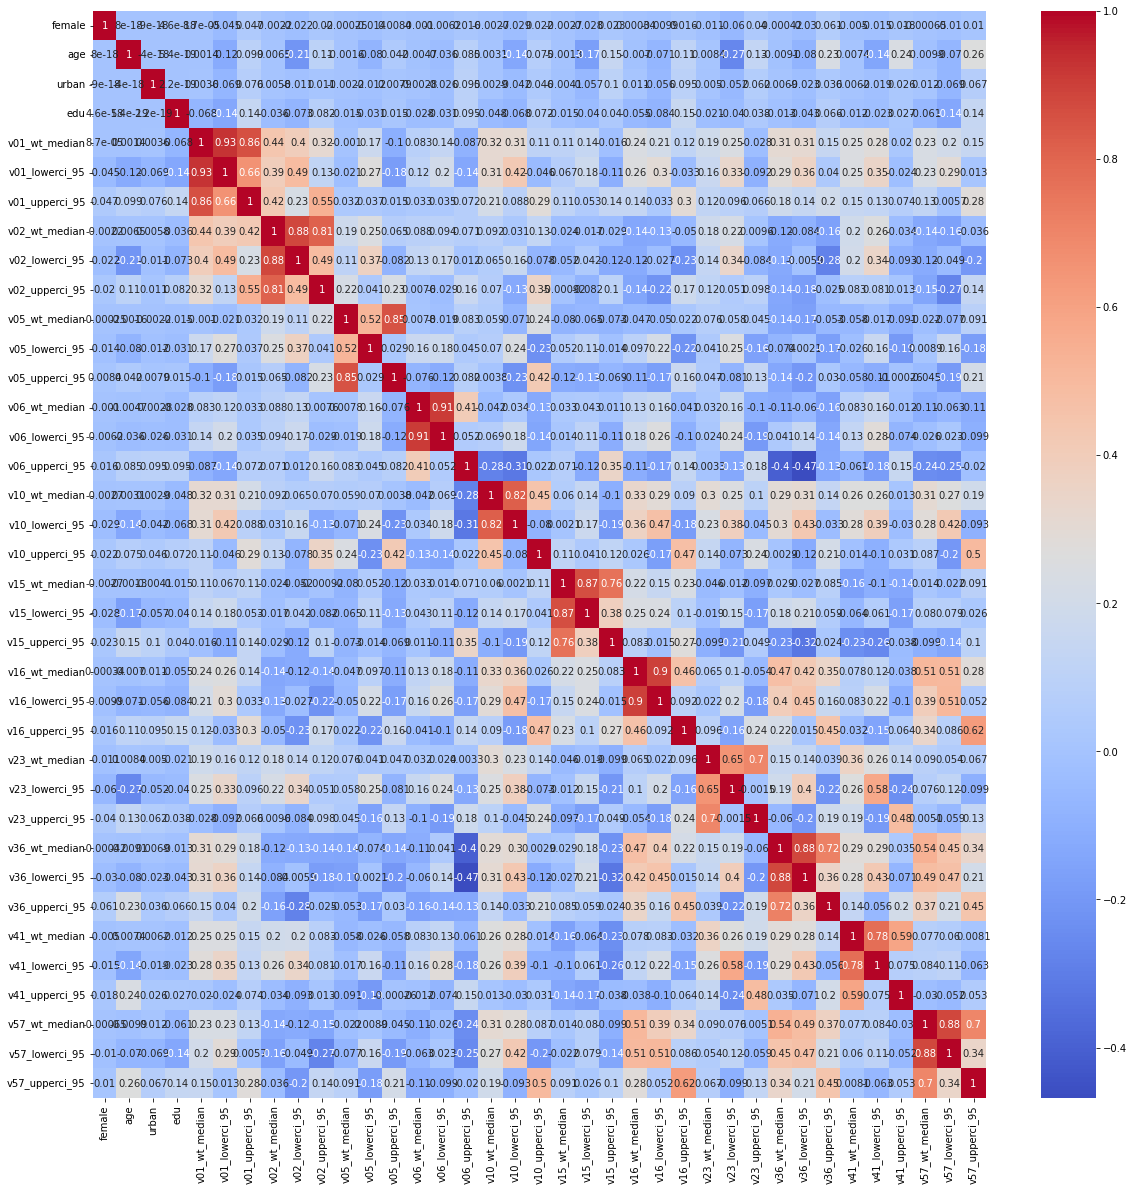

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dietBase.corr(), annot=True, cmap="coolwarm")

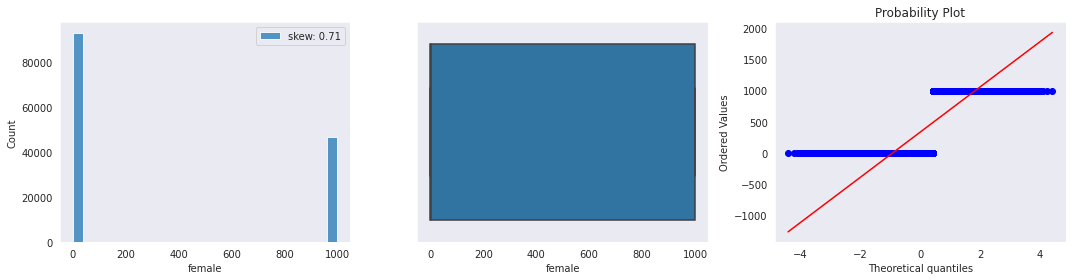

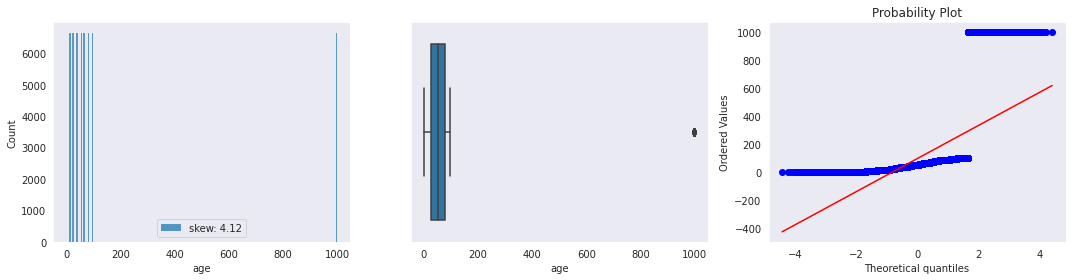

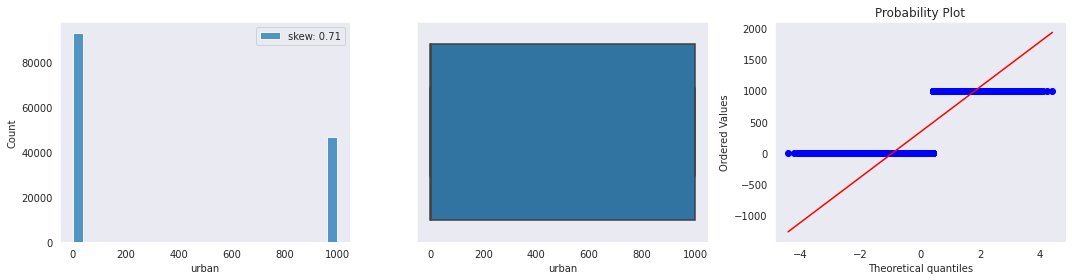

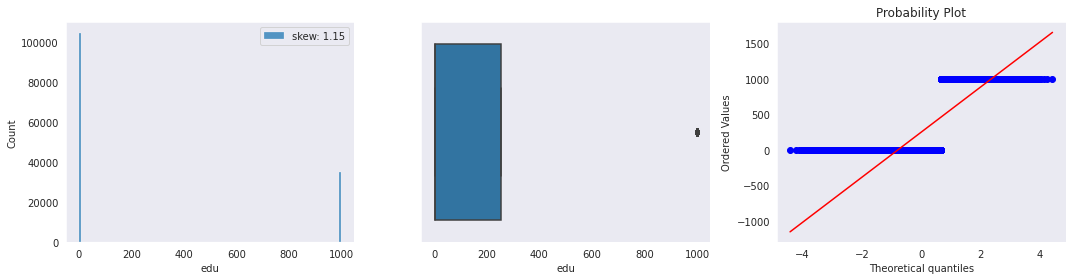

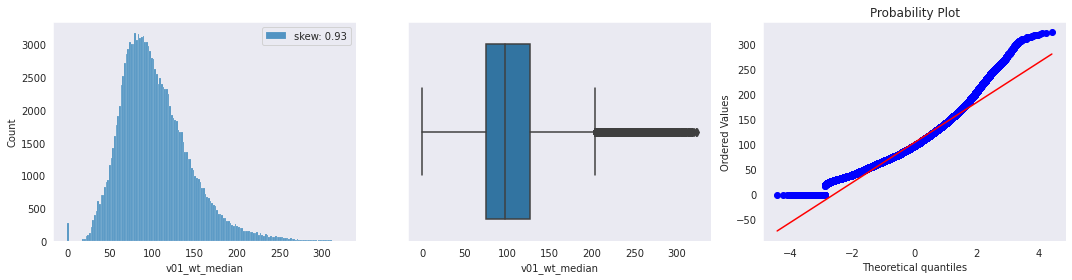

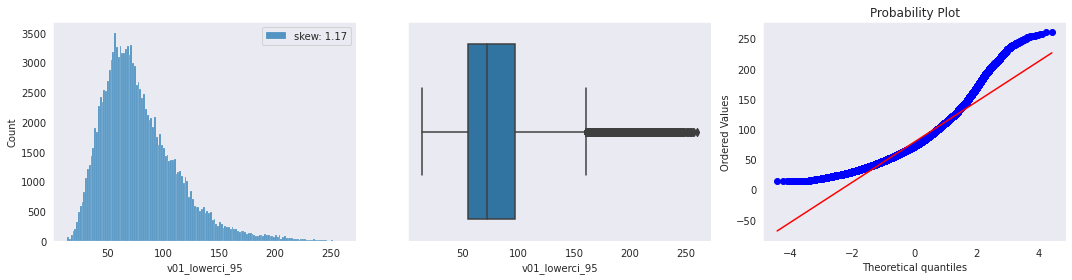

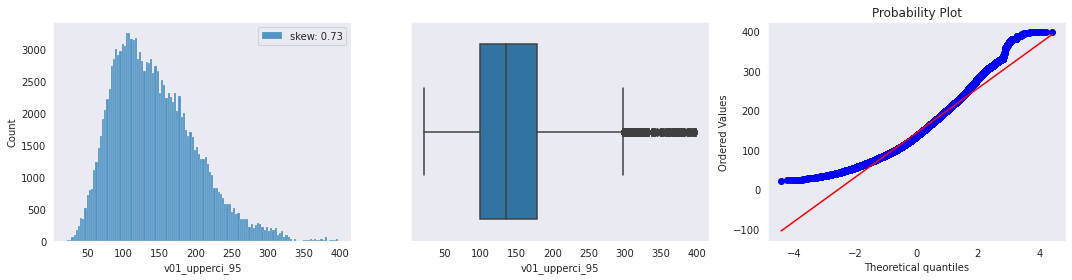

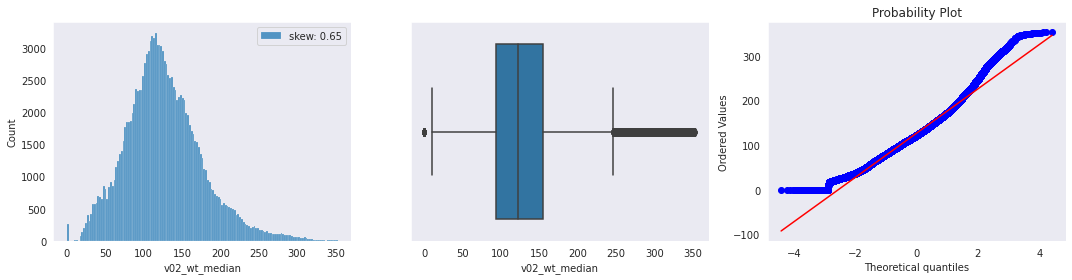

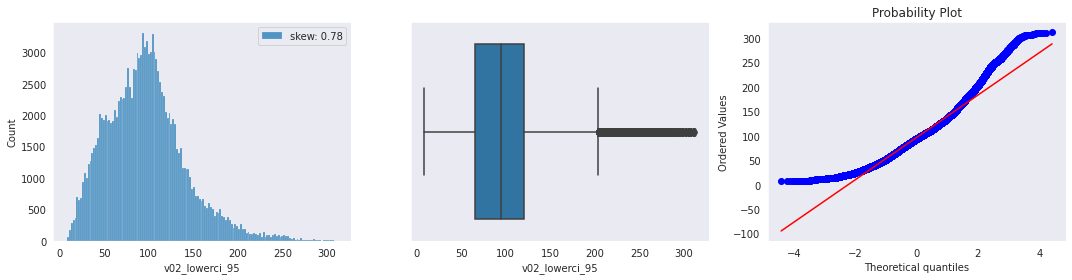

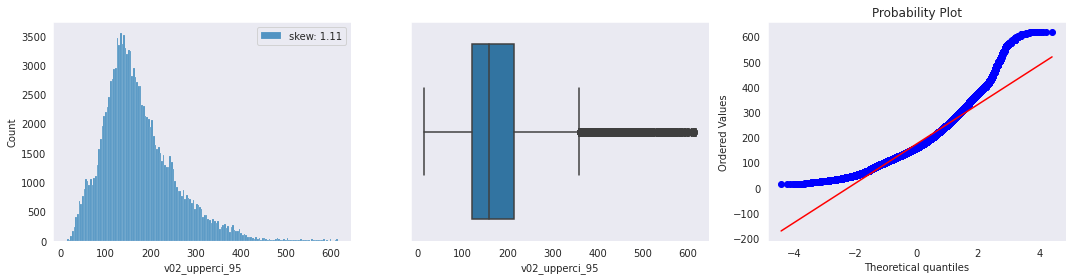

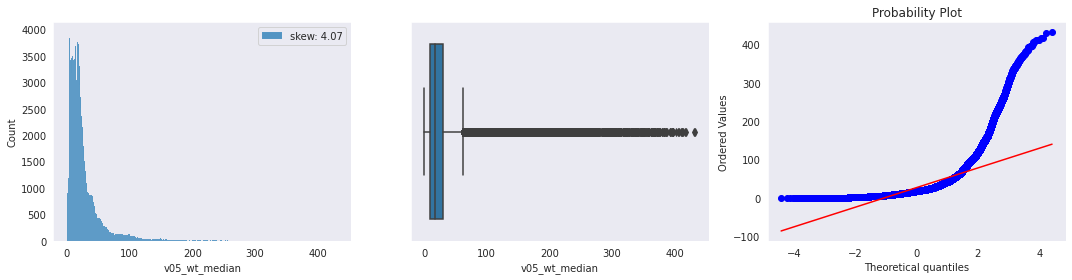

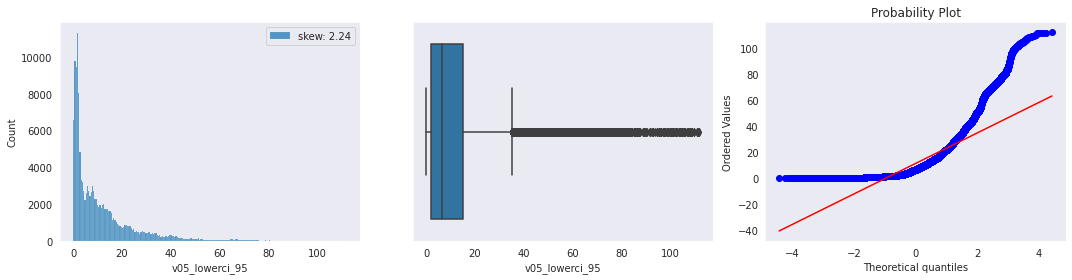

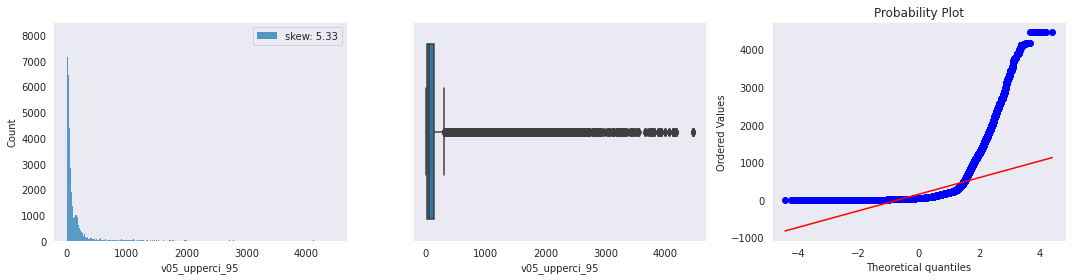

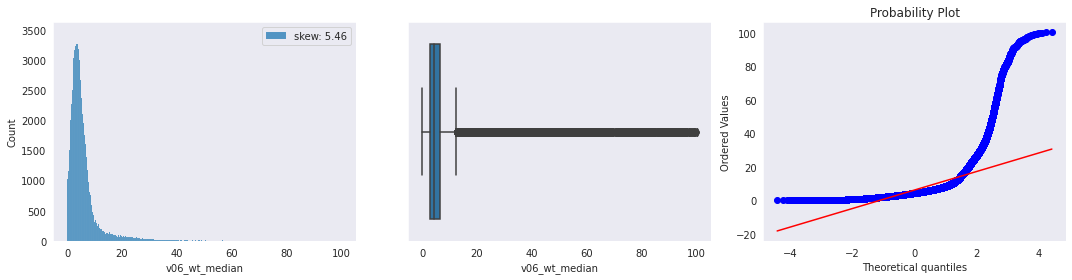

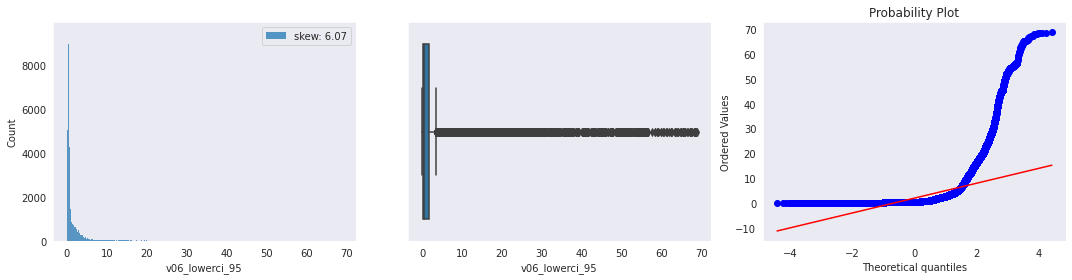

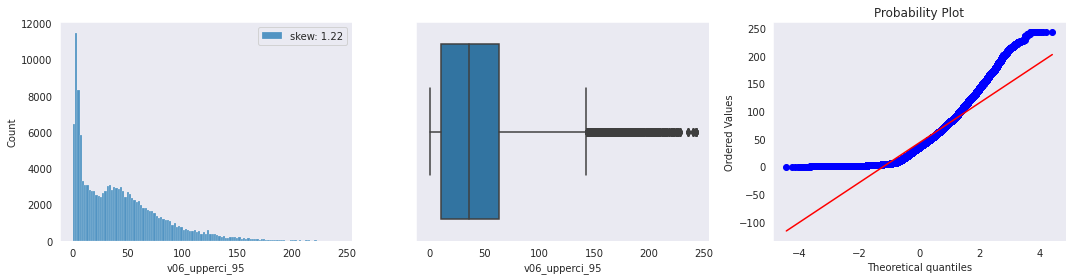

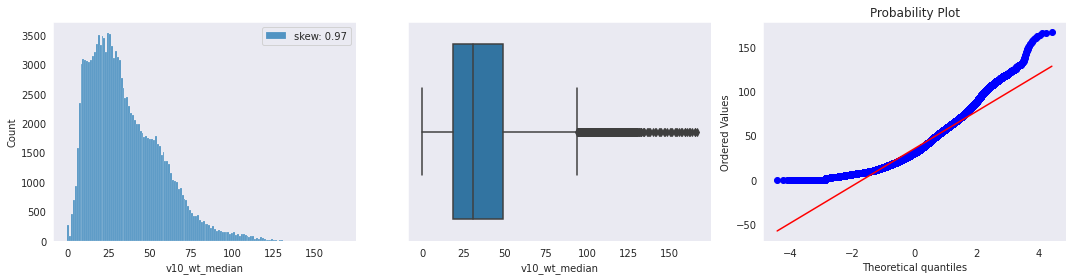

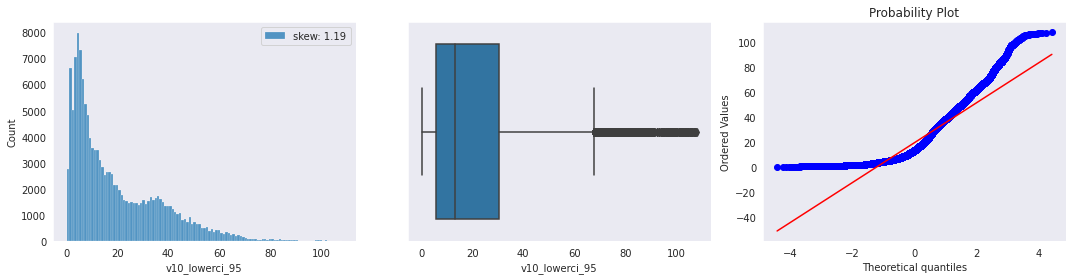

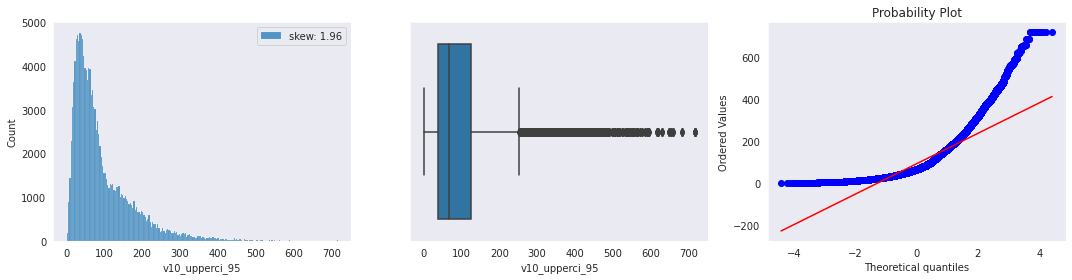

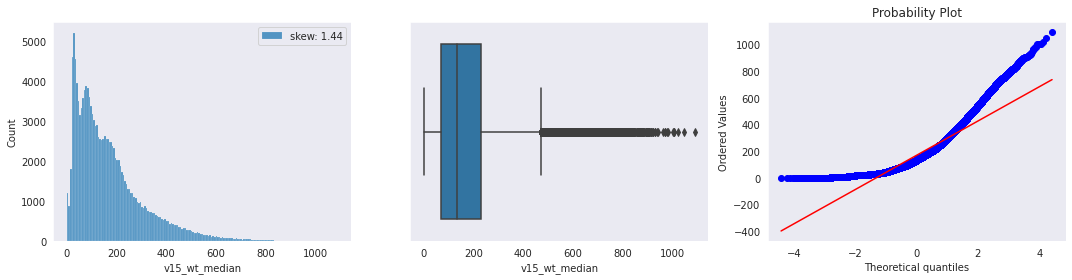

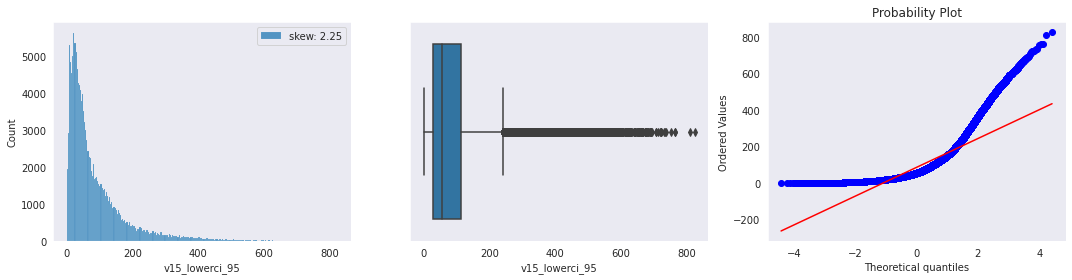

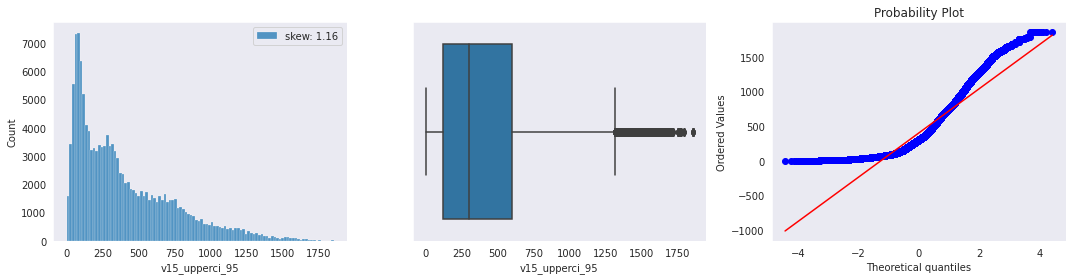

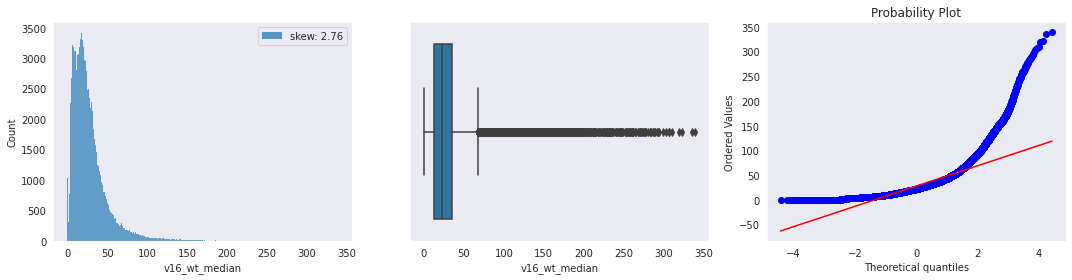

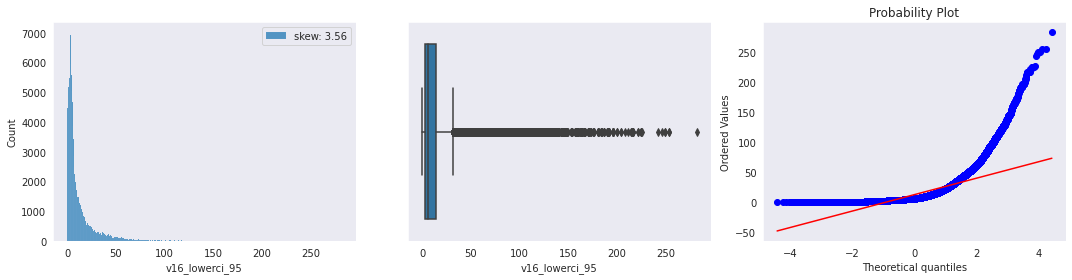

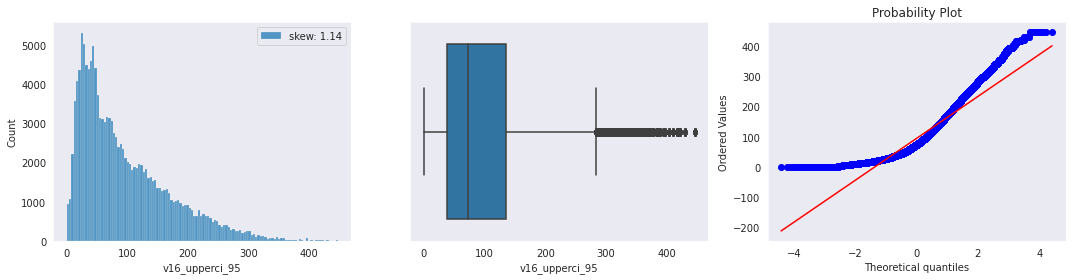

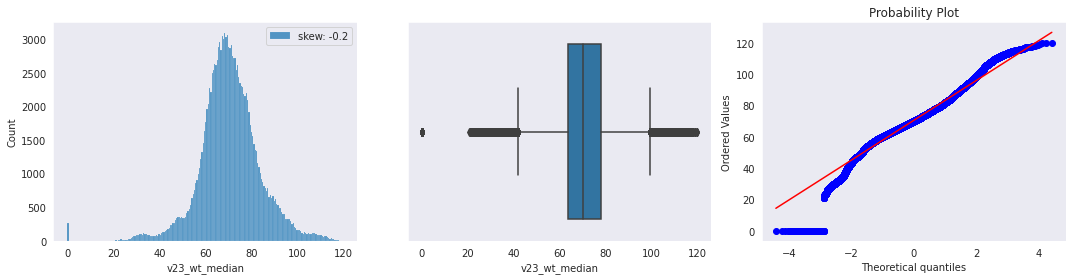

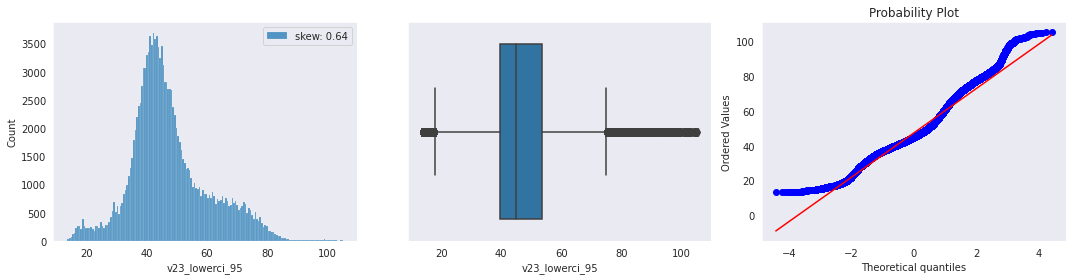

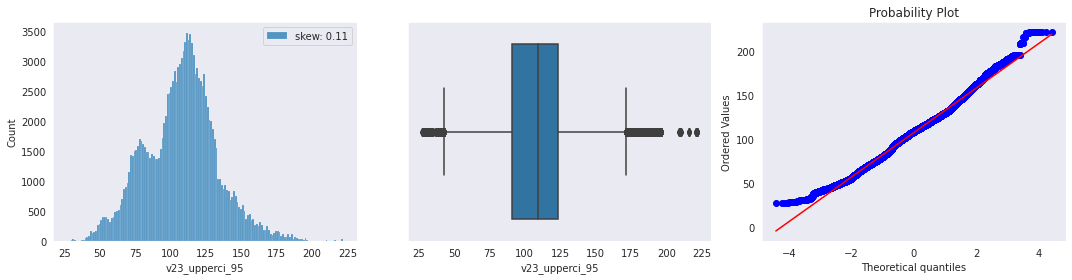

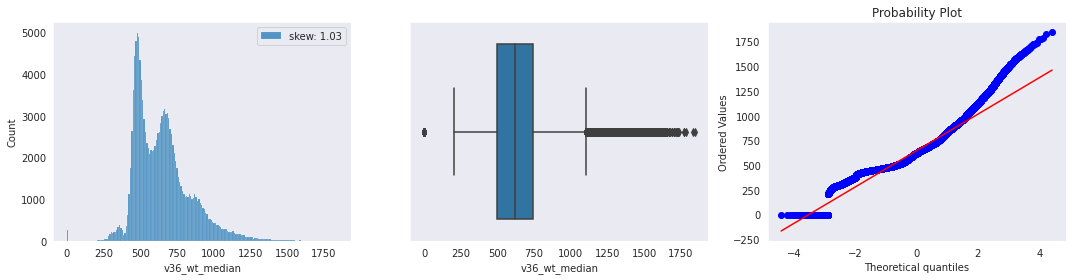

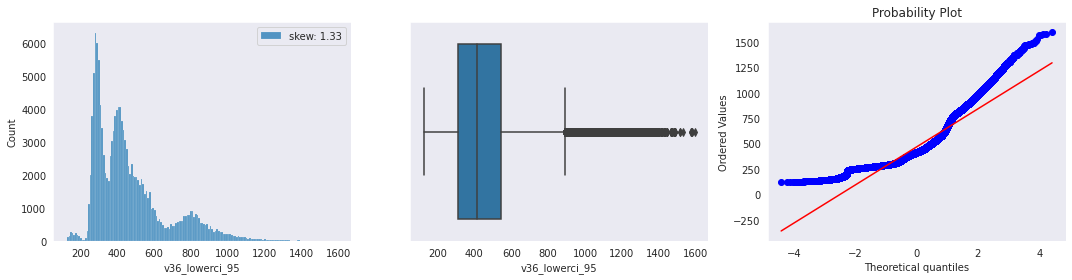

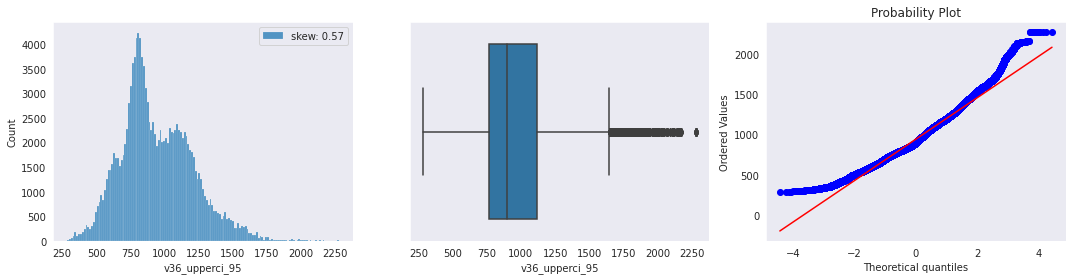

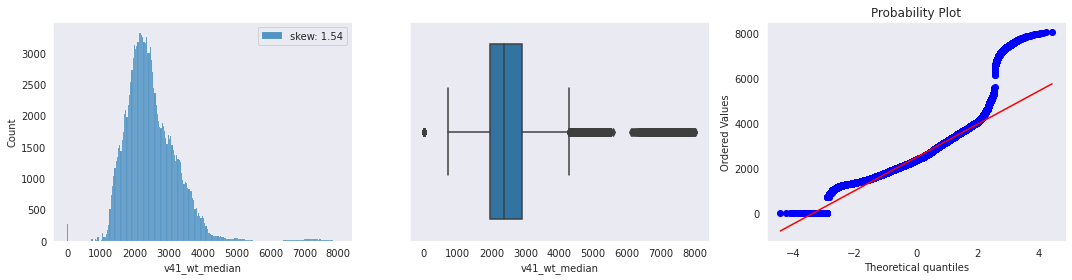

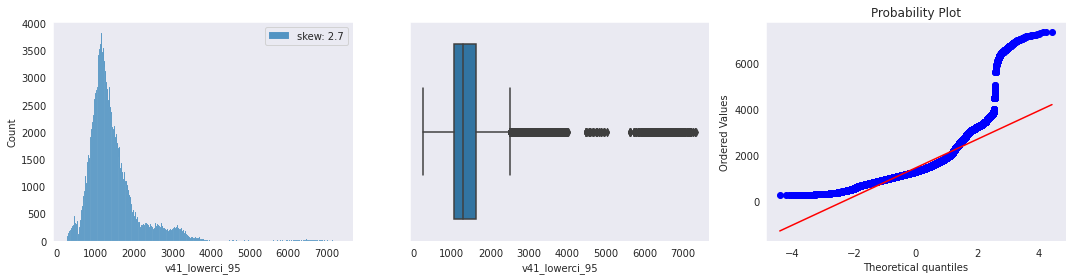

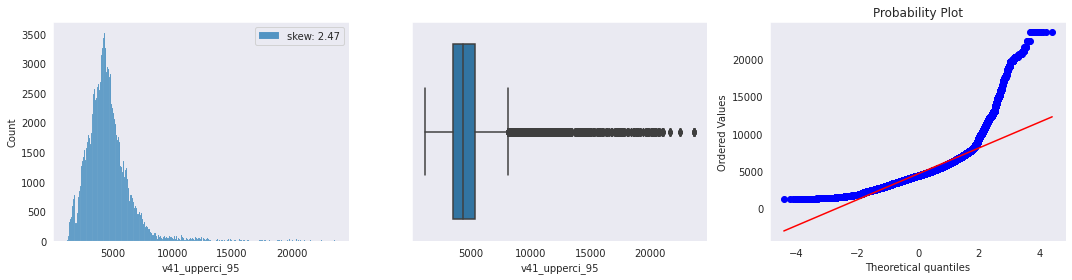

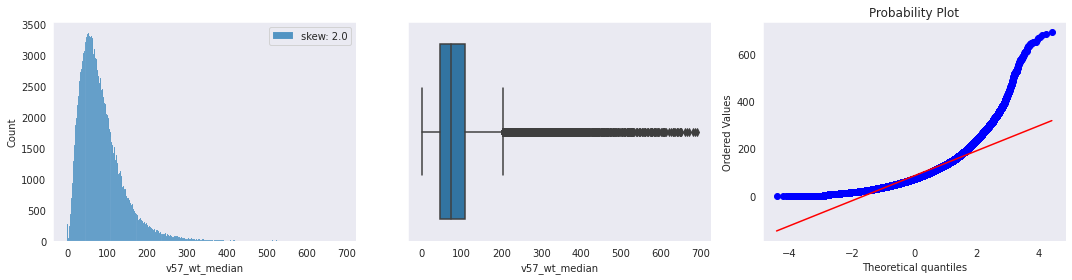

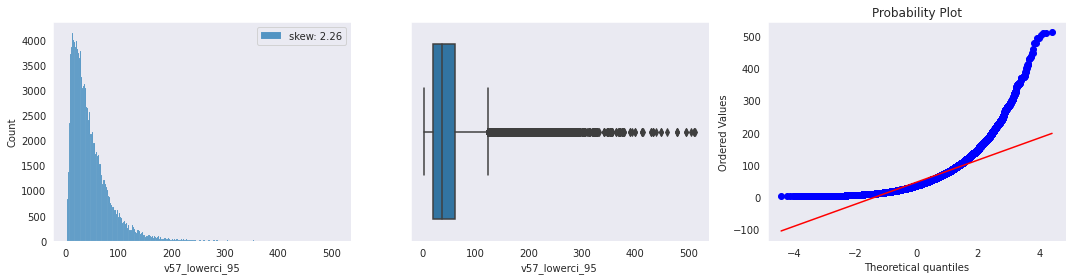

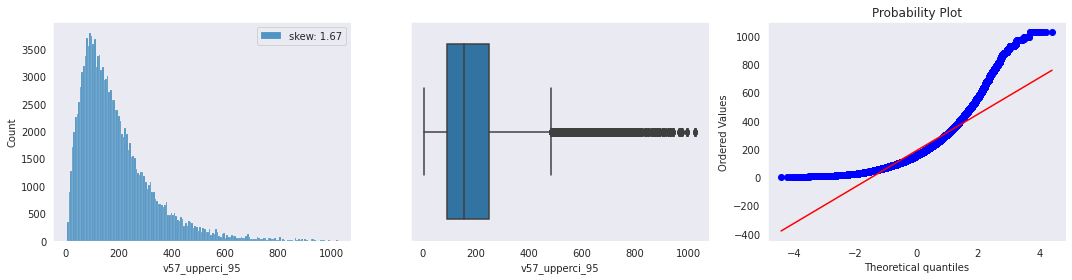

In [468]:
sns.set_style('dark')
df = dietBase.drop(['countryname','superregion2','iso3'], axis='columns')
features = df.columns
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(x=df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[col])
    plt.subplot(133)
    stats.probplot(x=df[col], plot=plt)
    plt.tight_layout()
    plt.show()

**2. Drop redundant information (columns)**

In [ ]:
dietBase.drop(['superregion2', 'iso3'], axis='columns', inplace=True)

**3. Check missing values**

In [ ]:
#Show number of missing values for every column
print(dietBase.isnull().sum().sort_values(ascending=False))
print('the total number of rows is ', dietBase.shape[0])

countryname       0
v23_upperci_95    0
v15_lowerci_95    0
v15_upperci_95    0
v16_wt_median     0
v16_lowerci_95    0
v16_upperci_95    0
v23_wt_median     0
v23_lowerci_95    0
v36_wt_median     0
female            0
v36_lowerci_95    0
v36_upperci_95    0
v41_wt_median     0
v41_lowerci_95    0
v41_upperci_95    0
v57_wt_median     0
v57_lowerci_95    0
v15_wt_median     0
v10_upperci_95    0
v10_lowerci_95    0
v10_wt_median     0
age               0
urban             0
edu               0
v01_wt_median     0
v01_lowerci_95    0
v01_upperci_95    0
v02_wt_median     0
v02_lowerci_95    0
v02_upperci_95    0
v05_wt_median     0
v05_lowerci_95    0
v05_upperci_95    0
v06_wt_median     0
v06_lowerci_95    0
v06_upperci_95    0
v57_upperci_95    0
dtype: int64
the total number of rows is  139860


# Covid-19 Base



**1. Read and Analyze data**


In [3]:
covidBase = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/basecovid.csv')
covidBase.shape

(61900, 12)

In [ ]:
covidBase

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,12/14/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,12/13/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/11/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,12/10/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,3/25/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,3/24/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,3/23/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,3/22/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
covidBase.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


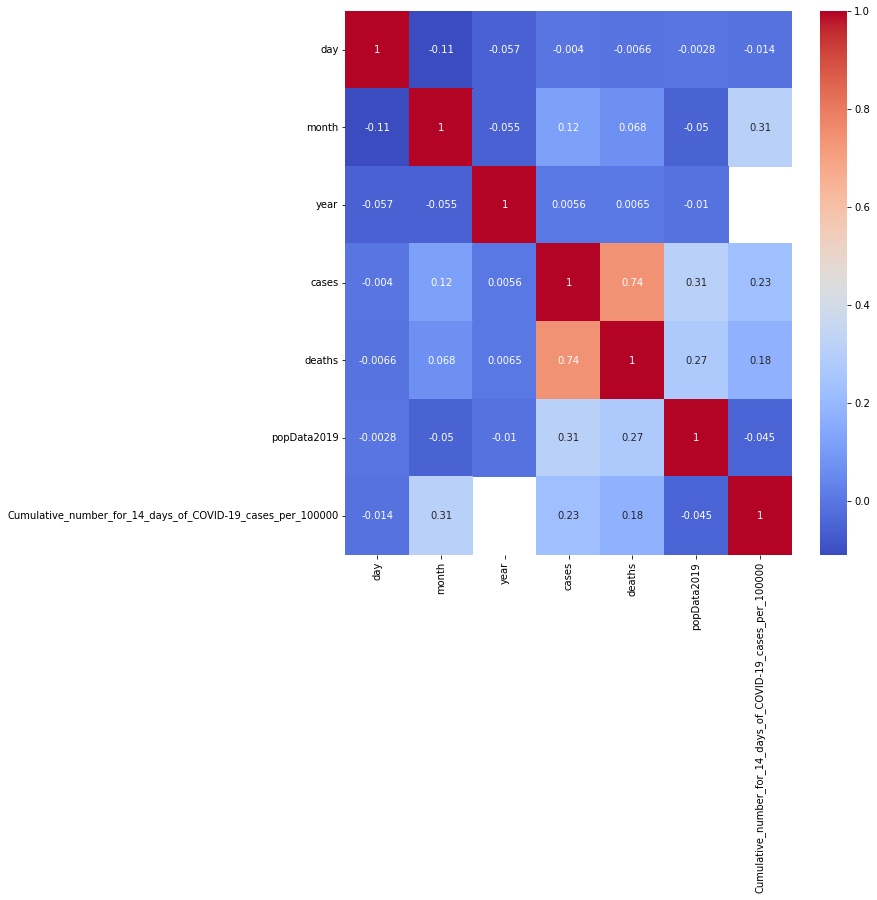

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(covidBase.corr(), annot=True, cmap="coolwarm")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


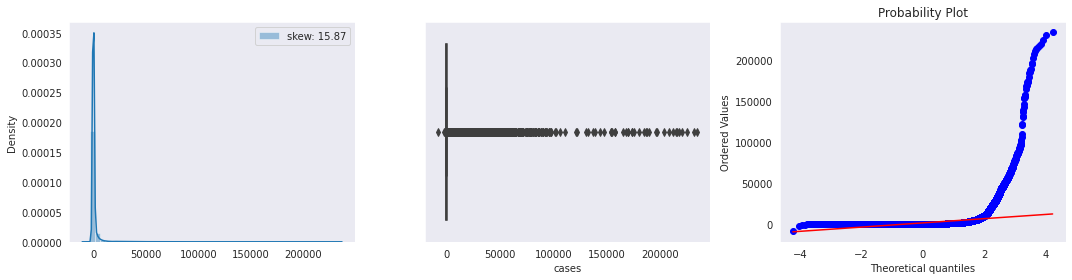

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


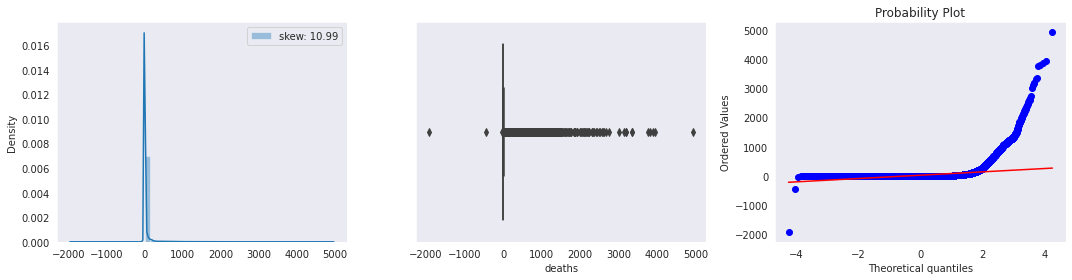

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


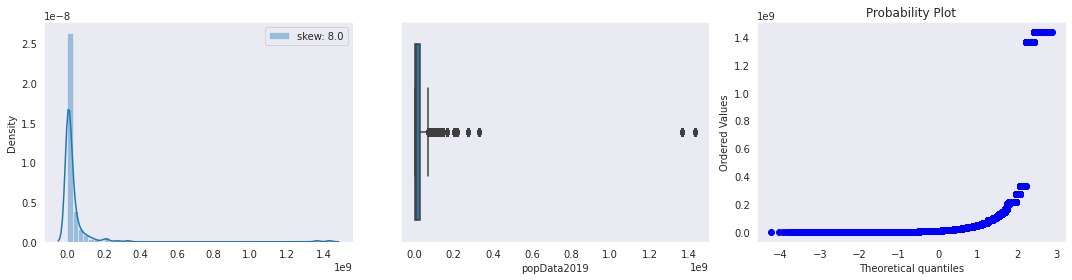

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


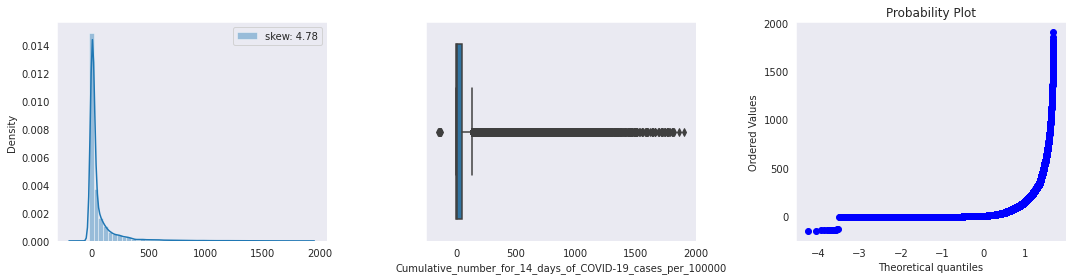

In [4]:
sns.set_style('dark')
df = covidBase.drop(['dateRep','geoId','countryterritoryCode','countriesAndTerritories', 'continentExp','day','year','month'], axis='columns')
features = df.columns
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(x=df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[col])
    plt.subplot(133)
    stats.probplot(x=df[col], plot=plt)
    plt.tight_layout()
    plt.show()

After Analysing the data, we notice that some features are redundant (country information), and some of them contain NaN values (cumulative number) and others are negative.

**2. Delete redundant features.**

In [ ]:
covidBase.drop(['dateRep', 'geoId', 'countryterritoryCode', 'continentExp'], axis='columns', inplace=True)

**3. Treat Missing values**



In [ ]:
print(covidBase.isnull().sum().sort_values(ascending=False))
print('the total number of rows is ', covidBase.shape[0])

Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
popData2019                                                    123
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
dtype: int64
the total number of rows is  61900


We notice that the only attribut that exceeds 20% is the **Cumulative_number_for_14_days_of_COVID-19_cases_per_100000**, So We have Three possible solutions:

1.   delete rows with missing values.
2.  Delete whole column
3. Deleting rows will extremly reduce the number of data which will reduce the quality of our solution. Deleting the column is wrong, because it represents the target. The solution i will opt for is to fill manually the missing data with the apropriate equation : Cumul of day x = ((sum of cases of 14days before the day x)/population)*100000



In [ ]:
for index in range(covidBase.shape[0]-14):
  if(math.isnan(covidBase.loc[index]['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])):
    sum = 0
    for i in range(14):
      if(covidBase.loc[index]['countriesAndTerritories'] == covidBase.loc[index+i]['countriesAndTerritories']):
        sum = sum + covidBase.loc[index+i]['cases']
    covidBase.at[index, 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = (sum/covidBase.loc[index]['popData2019'])*100000

#after manually filling the values, Some NaN values will remane, so we delete the according rows
covidBase = covidBase.dropna(subset=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

**4. Delete rows with noisy (wrong) data**


*   We notice that death cases and cumulative contains negative values which is not logical.



In [ ]:
print(len(covidBase[covidBase['cases'] <0]))
print(len(covidBase[covidBase['deaths'] <0]))
print(len(covidBase[covidBase['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] <0]))

17
8
40


In [ ]:
covidBase = covidBase[covidBase['cases'] >=0]
covidBase = covidBase[covidBase['deaths'] >=0]
covidBase = covidBase[covidBase['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] >=0]

**5. Population has a different value for every country, having the same scale for deaths and cases is not logical. To solve this, we replace cases and deaths with % ((deaths*100)/population)**

In [ ]:
# Earlier we deleted some rows, we need to reset the index
covidBase.reset_index(drop=True, inplace=True)

covidBase["cases"] = pd.to_numeric(covidBase["cases"], downcast="float")
covidBase["deaths"] = pd.to_numeric(covidBase["deaths"], downcast="float")

for i in range(covidBase.shape[0]):
  covidBase.at[i, 'cases'] = ((covidBase.loc[i]['cases'])*100)/covidBase.loc[i]['popData2019']
  covidBase.at[i, 'deaths'] = ((covidBase.loc[i]['deaths'])*100)/covidBase.loc[i]['popData2019']
covidBase.drop(['popData2019'], axis='columns', inplace=True)




# MERGE DATABASES






**Select the appropriate rows in dietBase**

In the dietBase, examples are grouped by age, education and urban categories. The value 999 neglects the category type, for example age=999 means all ages, female =999 means that both genders are concerned. The covidBase estimates the features for all genders, ages and regions, for this reason we will consider in dietBase only rows with 999 values.


In [ ]:
dietBase= dietBase[(dietBase["female"]==999) & (dietBase["age"]==999) & (dietBase["urban"]==999) & (dietBase["edu"]==999)]
dietBase.drop(['female', 'age', 'urban', 'edu'], axis='columns', inplace=True)

In [ ]:
covidBase.rename(columns = {'countriesAndTerritories':'countryname'}, inplace = True)
DataMerged = covidBase.merge(dietBase,on='countryname')
DataMerged.shape

(40421, 40)


# Standardization




Many Algorithms get effected by features based on different scales, predictions will go wrong. Many solutions are present, I have chosen the Standardization because it is not sensitive to outliers (our dataset present many of them).

In [ ]:
DataMergedStand    = DataMerged.drop(['day','month','year','countryname'], axis='columns')
DataMergedNotStand = DataMerged[['day','month','year','countryname']].copy()

scale = StandardScaler().fit(DataMergedStand)
X_train_stand = scale.transform(DataMergedStand)
DataMergedStand = pd.DataFrame(X_train_stand, columns=DataMergedStand.columns)
DataMerged =DataMergedNotStand.join(DataMergedStand)

# Encode Data

Many methods are used to encode data. LabelEncoder and OneHotEncoder are the most popular. OneHotEncoder is used to encode categorical **features** where the order(level, example: high, medium, high) doesn't matter. LabelEncoder is used to encode categorical target where the order matters.

In [ ]:
encoder = OneHotEncoder()
country_codes=encoder.fit_transform(DataMerged[['countryname']]).toarray()
country_labels = encoder.categories_
encodedCountriesBase = pd.DataFrame(country_codes, columns=country_labels)
DataMerged.drop(['countryname'], axis='columns', inplace=True)
DataMerged = pd.concat([DataMerged, encodedCountriesBase], axis=1, join='inner')

# Handling outliers (CovidBase)

After analysing the boxplots above, we notice that we have a considerable number of outliers in the covid dataset, we can simply use Trimming or windsorizing methods to deal with them (remove or replace them). BUT, in our case, these information might be significant, they probably represent the period were contaminations and deaths were epic. Therfor, i will keep them and delete the distant points only 

In [ ]:
DataMerged = DataMerged[DataMerged['deaths']<11]

# Handling outliers (DietBase)

After analysing the boxplots above, we notice a small number of outliers for every feature. We can remove them, but these will highly decrease the number of rows (the dataset will have about 2500 row). I have chosen to replace them with the min or max value

In [ ]:
DataMerged.v01_wt_median.loc[DataMerged.v01_wt_median > 2.5]  = 2.3
DataMerged.v01_lowerci_95.loc[DataMerged.v01_lowerci_95 > 2.1]  = 2.06
DataMerged.v02_wt_median.loc[DataMerged.v02_wt_median > 2.7]  = 2.62
DataMerged.v02_lowerci_95.loc[DataMerged.v02_lowerci_95 > 2]  = 1.867
DataMerged.v02_upperci_95.loc[DataMerged.v02_upperci_95 > 2.2]  = 2.199
DataMerged.v05_wt_median.loc[DataMerged.v05_wt_median > 1.1]  = 1.007
DataMerged.v05_lowerci_95.loc[DataMerged.v05_lowerci_95 > 1.5]  = 1.4549
DataMerged.v05_upperci_95.loc[DataMerged.v05_upperci_95 > 0.71]  = 0.7
DataMerged.v06_wt_median.loc[DataMerged.v06_wt_median > 0.5]  = 0.45
DataMerged.v06_lowerci_95.loc[DataMerged.v06_lowerci_95 > 0.4]  = 0.3798
DataMerged.v10_upperci_95.loc[DataMerged.v10_upperci_95 > 2]  = 1.854
DataMerged.v15_wt_median.loc[DataMerged.v15_wt_median > 1.9]  = 1.8
DataMerged.v15_lowerci_95.loc[DataMerged.v15_lowerci_95 > 1.7]  = 1.66
DataMerged.v16_wt_median.loc[DataMerged.v16_wt_median > 1.5]  = 1.49
DataMerged.v16_lowerci_95.loc[DataMerged.v16_lowerci_95 > 0.9]  = 0.83
DataMerged.v23_lowerci_95.loc[DataMerged.v23_lowerci_95 > 2.1]  = 2.08
DataMerged.v57_wt_median.loc[DataMerged.v57_wt_median > 3]  = 2.022
DataMerged.v41_lowerci_95.loc[DataMerged.v41_lowerci_95 > 2]  = 1.8182
DataMerged.v41_wt_median.loc[DataMerged.v41_wt_median > 3]  = 2.10



# Split according to vacc period




The covidBase contains the period from March to december 2020 where the vaccination has started, so we split the data into two datasets : 2019+ jan and feb 2020, March to december 2020. We will process both of datasets separately and check which one gives better results. ==> by concedering these two periods we won't need the date information.



In [ ]:
DataMergedBeforeVacc = DataMerged[(DataMerged['year'] == 2019) | ((DataMerged['year']==2020) & ((DataMerged['month']==1 )|(DataMerged['month']==2)))]
DataMergedAfterVacc = DataMerged[(DataMerged['year']==2020) & ((DataMerged['month']!=1)&(DataMerged['month']!=2))]
DataMergedBeforeVacc.drop(['day', 'month', 'year'], axis='columns', inplace=True)
DataMergedAfterVacc.drop(['day', 'month', 'year'], axis='columns', inplace=True)

In [ ]:
DataMergedBeforeVacc.to_csv('DataBeforeVacc.csv')
DataMergedAfterVacc.to_csv('DataAfterVacc.csv')